In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('/kaggle/input/iris-dataset/iris.data.csv',header=None)

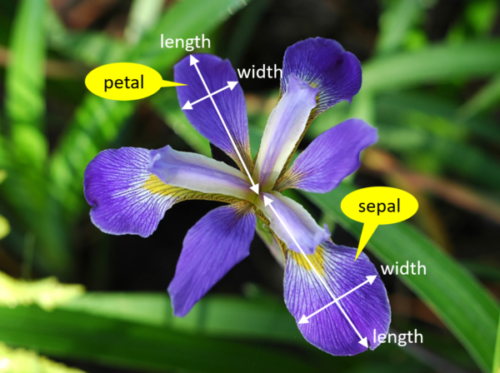

In [4]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']

In [6]:
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### <font color =red>No null values</font>

In [8]:
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.Species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### <font color = red > 3 different species of Iris flowers with 50 rows of petal and sepal dimensions each</font>

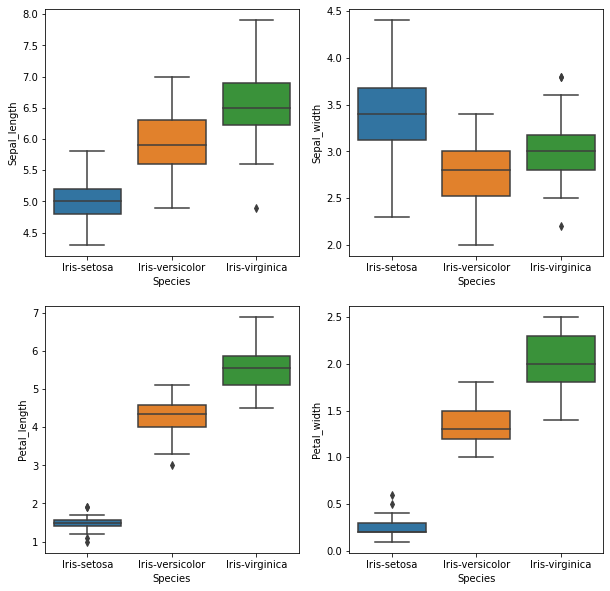

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(x= data.Species,y=data.Sepal_length)
plt.subplot(2,2,2)
sns.boxplot(x= data.Species,y=data.Sepal_width)
plt.subplot(2,2,3)
sns.boxplot(x= data.Species,y=data.Petal_length)
plt.subplot(2,2,4)
sns.boxplot(x= data.Species,y=data.Petal_width)
plt.show()

### <font color = red>Iris-virginica has higher median Sepal, Petal lengths and Petal width while Iris-setosa has high median sepal width</font>

# Bi-Variate Analysis : Categorical - Numerical

## <font color=red> Bar plot for different species and their parameters </font>

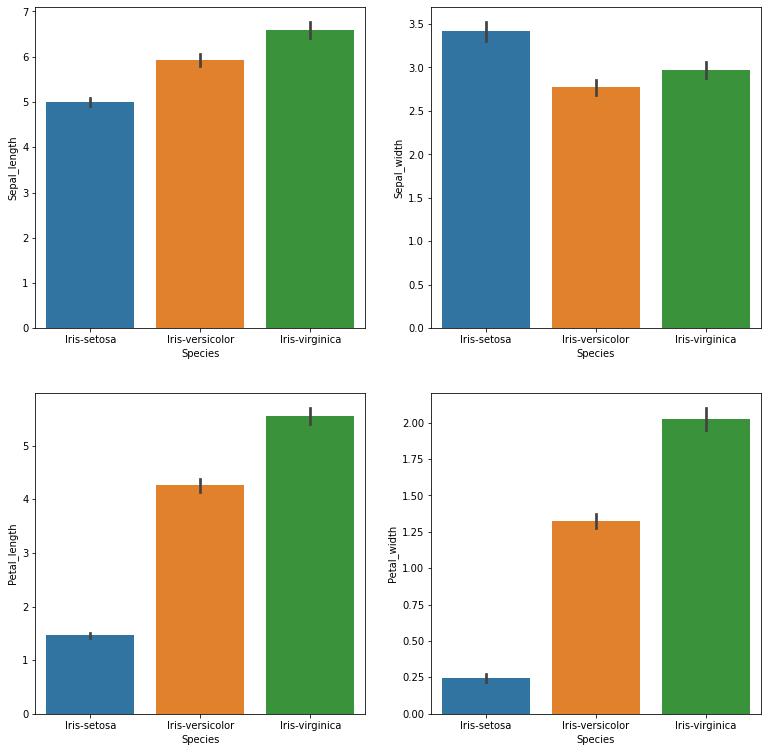

In [12]:
plt.figure(figsize=(13,13))

plt.subplot(2,2,1)
sns.barplot(x=data.Species,y=data.Sepal_length)
plt.subplot(2,2,2)
sns.barplot(x=data.Species,y=data.Sepal_width)
plt.subplot(2,2,3)
sns.barplot(x=data.Species,y=data.Petal_length)
plt.subplot(2,2,4)
sns.barplot(x=data.Species,y=data.Petal_width)

plt.show()


### <font color = red> Of all the 3 varieties, Iris-Setosa has the lowest mean Petal length and width </font>

# Bi-Variate Analysis : Numerical - Numerical

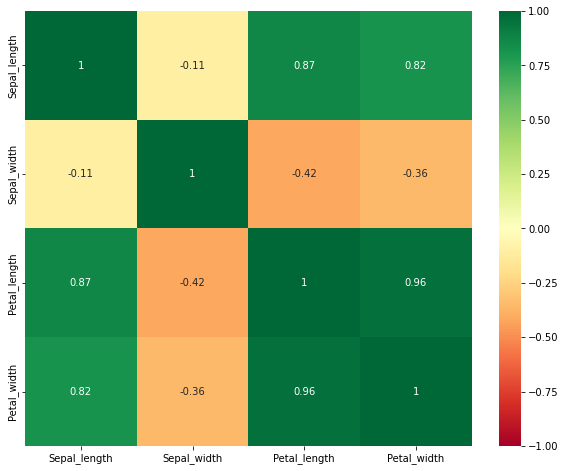

In [13]:
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr,cmap='RdYlGn',annot=True,vmin=-1.0,vmax=1.0,center=0)
plt.show()

## <font color = red> There seems to be high correlation between Petal length, Petal Width and Sepal length </font>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

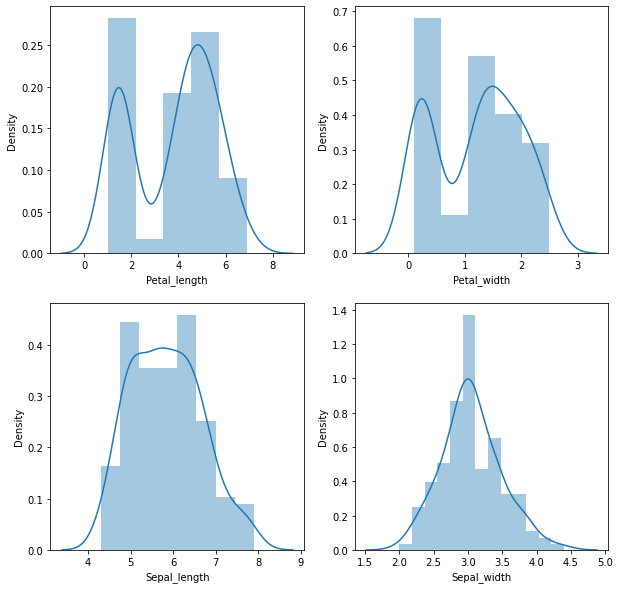

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data['Petal_length'])
plt.subplot(2,2,2)
sns.distplot(data['Petal_width'])
plt.subplot(2,2,3)
sns.distplot(data['Sepal_length'])
plt.subplot(2,2,4)
sns.distplot(data['Sepal_width'])
plt.show()

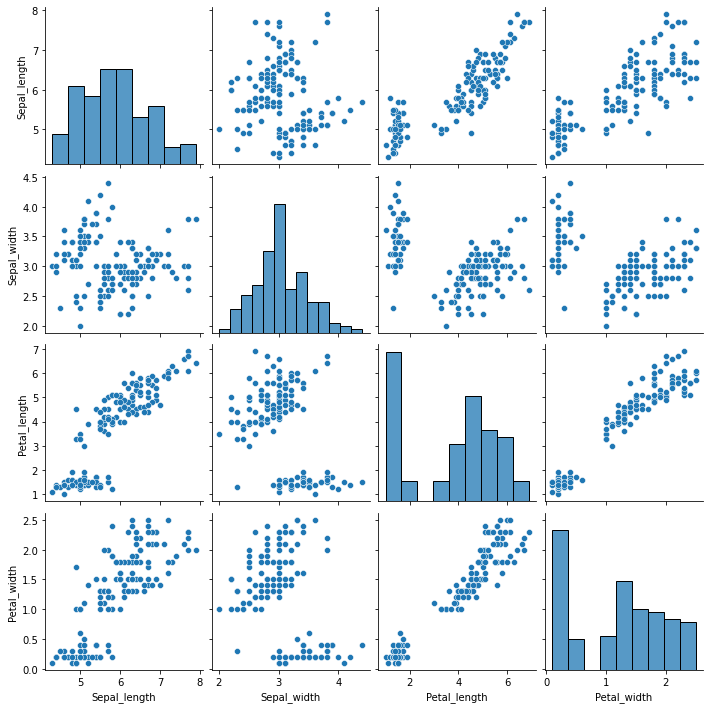

In [15]:
sns.pairplot(data)
plt.show()